# Proyek Analisis Data: Nama dataset
- Nama: Alfiah Hidayatillah
- Email:alfiah19ti@mahasiswa.pcr.ac.id
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- Apakah terdapat perbedaan signifikan dalam tingkat polusi udara pada jam-jam tertentu dalam sehari?
- Bagaimana hubungan antara suhu, tekanan udara, dan kelembapan terhadap tingkat polusi udara?
- Apakah ada korelasi antara curah hujan dengan tingkat polusi udara?

## Menyaipkan semua library yang dibuthkan

In [1]:
!pip install pandas matplotlib seaborn streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st

## Data Wrangling

### Gathering Data

In [4]:
import pandas as pd

# URL tempat dataset tersedia
url = 'https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv'

# Membaca dataset dari URL ke dalam dataframe Pandas
dataset = pd.read_csv(url)

### Assessing Data

In [5]:
print(dataset.info())
print(dataset.describe())
print(dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None
                 No          year         month           day  

In [6]:
print(dataset.isnull().sum())

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


<Axes: >

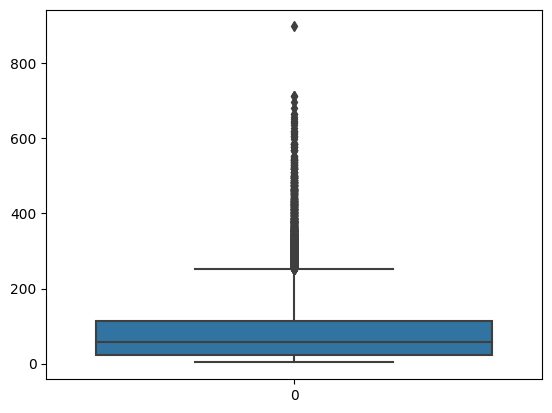

In [8]:
import seaborn as sns
sns.boxplot(data=dataset['PM2.5'])

In [9]:
print(dataset.duplicated().sum())

0


### Cleaning Data

In [12]:
# Menghapus baris dengan nilai kosong
dataset.dropna(inplace=True)

# Mengisi nilai kosong dengan mean dari kolom tersebut
dataset['PM2.5'].fillna(dataset['PM2.5'].mean(), inplace=True)
dataset['PM10'].fillna(dataset['PM10'].mean(), inplace=True)
dataset['SO2'].fillna(dataset['SO2'].mean(), inplace=True)
dataset['NO2'].fillna(dataset['NO2'].mean(), inplace=True)

In [14]:
q1 = dataset['PM2.5'].quantile(0.05)  # Nilai percentile 5%
q3 = dataset['PM2.5'].quantile(0.95)  # Nilai percentile 95%
lower_bound = q1
upper_bound = q3

# Menghapus outliers dengan batasan tertentu
dataset = dataset[(dataset['PM2.5'] >= lower_bound) & (dataset['PM2.5'] <= upper_bound)]


## Exploratory Data Analysis (EDA)

### Explore ...

In [18]:
# Melihat informasi umum dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29046 entries, 1 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       29046 non-null  int64  
 1   year     29046 non-null  int64  
 2   month    29046 non-null  int64  
 3   day      29046 non-null  int64  
 4   hour     29046 non-null  int64  
 5   PM2.5    29046 non-null  float64
 6   PM10     29046 non-null  float64
 7   SO2      29046 non-null  float64
 8   NO2      29046 non-null  float64
 9   CO       29046 non-null  float64
 10  O3       29046 non-null  float64
 11  TEMP     29046 non-null  float64
 12  PRES     29046 non-null  float64
 13  DEWP     29046 non-null  float64
 14  RAIN     29046 non-null  float64
 15  wd       29046 non-null  object 
 16  WSPM     29046 non-null  float64
 17  station  29046 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.2+ MB
None


In [16]:
# Statistik deskriptif untuk variabel numerik
print(dataset.describe())

                 No          year         month           day         hour  \
count  29046.000000  29046.000000  29046.000000  29046.000000  29046.00000   
mean   17779.100771   2014.705467      6.349205     15.638470     11.65169   
std    10000.791865      1.155276      3.333565      8.771769      6.91235   
min        2.000000   2013.000000      1.000000      1.000000      0.00000   
25%     9518.250000   2014.000000      4.000000      8.000000      6.00000   
50%    18023.500000   2015.000000      6.000000     16.000000     12.00000   
75%    26500.750000   2016.000000      9.000000     23.000000     18.00000   
max    35064.000000   2017.000000     12.000000     31.000000     23.00000   

              PM2.5         PM10           SO2           NO2            CO  \
count  29046.000000  29046.00000  29046.000000  29046.000000  29046.000000   
mean      71.961007     99.92359     16.126788     56.854644   1130.254045   
std       57.846718     75.52334     20.599325     32.830078   

In [17]:
# Statistik deskriptif untuk variabel kategorikal
print(dataset['wd'].value_counts())

NE     4095
ENE    3175
SW     2943
E      2142
NNE    2000
WSW    1920
SSW    1859
N      1642
ESE    1478
NW     1427
NNW    1234
SE     1169
S      1156
W      1020
SSE     898
WNW     888
Name: wd, dtype: int64


In [19]:
# Menampilkan beberapa baris pertama data
print(dataset.head())

    No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
1    2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2    3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
15  16  2013      3    1    15    8.0  15.0   7.0  14.0  400.0  76.0   6.2   
16  17  2013      3    1    16    9.0  19.0   9.0  13.0  400.0  76.0   5.9   
17  18  2013      3    1    17   10.0  23.0  11.0  15.0  400.0  74.0   4.3   

      PRES  DEWP  RAIN   wd  WSPM       station  
1   1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2   1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
15  1025.7 -18.6   0.0  NNE   2.8  Aotizhongxin  
16  1025.6 -18.1   0.0  NNW   3.9  Aotizhongxin  
17  1026.3 -18.7   0.0  NNE   2.8  Aotizhongxin  


In [21]:
# Menampilkan data yang memiliki nilai null
print(dataset[dataset.isnull().any(axis=1)])

Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station]
Index: []


## Visualization & Explanatory Analysis

### Pertanyaan 1:

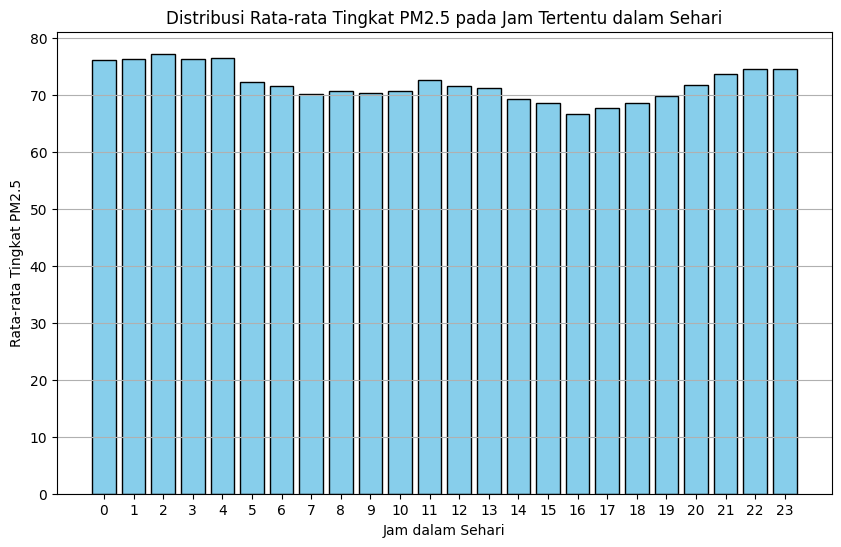

In [26]:
# Menghitung rata-rata tingkat PM2.5 pada setiap jam dalam sehari
hourly_avg_PM25 = dataset.groupby('hour')['PM2.5'].mean()

# Membuat histogram untuk menampilkan distribusi rata-rata tingkat PM2.5 pada jam tertentu dalam sehari
plt.figure(figsize=(10, 6))
plt.bar(hourly_avg_PM25.index, hourly_avg_PM25.values, color='skyblue', edgecolor='black')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Tingkat PM2.5')
plt.title('Distribusi Rata-rata Tingkat PM2.5 pada Jam Tertentu dalam Sehari')
plt.xticks(hourly_avg_PM25.index)
plt.grid(axis='y')
plt.show()

### Pertanyaan 2:

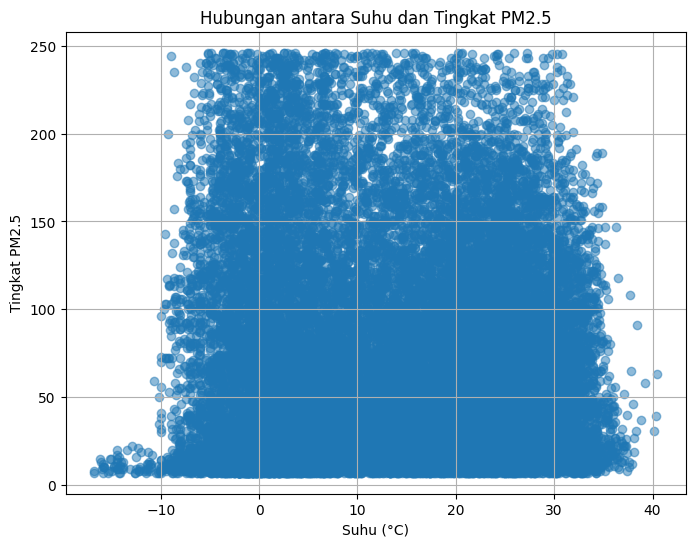

In [23]:
# Membuat scatter plot untuk hubungan antara suhu dengan tingkat PM2.5
plt.figure(figsize=(8, 6))
plt.scatter(dataset['TEMP'], dataset['PM2.5'], alpha=0.5)
plt.xlabel('Suhu (°C)')
plt.ylabel('Tingkat PM2.5')
plt.title('Hubungan antara Suhu dan Tingkat PM2.5')
plt.grid(True)
plt.show()

### Pertanyaan 3 :

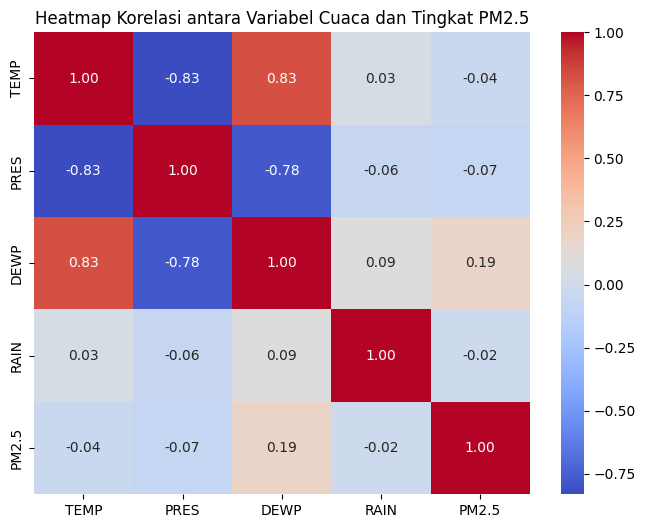

In [24]:
# Membuat heatmap untuk melihat korelasi antara variabel cuaca dengan tingkat polusi udara
correlation_matrix = dataset[['TEMP', 'PRES', 'DEWP', 'RAIN', 'PM2.5']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi antara Variabel Cuaca dan Tingkat PM2.5')
plt.show()

## Conclusion

- Conclution pertanyaan 1


dari visualisasi dapat dilihat bahwa pada jam 16 memiliki nilai yang terendah dalam distribusi rata-rata tingkat PM2.5 dibandingkan dengan jam-jam lain dalam sehari, bisa diinterpretasikan bahwa pada jam tersebut, rata-rata tingkat PM2.5 cenderung paling rendah dibandingkan dengan jam-jam lainnya.Kemudian paling tinggi pada jam 2.


- conclution pertanyaan 2

dapat dilihat bahwa tingkat PM2.5 berubah seirin dengan perubahan suhu udara.Setiap titik pada plot mewakili pasangan nilai suhu dan tingkat PM2.5 pada saat tertentu. Pada suhu rendah tingkat PM2.5 cenderung rendah dan pada suhu 20-20 tingkat pm rata rata adalah 150-200.


- conclution pertanyaan 3

Pada heatmap korelasi, nilai korelasi antara setiap pasangan variabel akan ditampilkan dalam bentuk warna yang berbeda. Skala warna pada heatmap menunjukkan seberapa kuat korelasi antara pasangan variabel tersebut.

Jika nilai korelasi mendekati 1, itu menunjukkan korelasi positif sempurna (hubungan linear positif).
Jika nilai korelasi mendekati -1, itu menunjukkan korelasi negatif sempurna (hubungan linear negatif).
Jika nilai korelasi mendekati 0, itu menunjukkan tidak adanya korelasi antara variabel tersebut.